<h1>YumPy</h1>

<b>Group Members:</b>
<ul>
<li>Randi Howell</li>
<li>Kyrus Wankadiya</li>
<li>Catherine Safrit</li>
<li>Monica Sehgal</li>
</ul>


<h3>Data Used</h3>
<ul>
<li>Income: https://www.kaggle.com/muonneutrino/us-census-demographic-data/data   </li>
<li>Education: https://www.ers.usda.gov/data-products/county-level-data-sets/</li>
<li>Yelp Fusion API: https://www.yelp.com/fusion</li>
</ul>


<h1>From the top!</h1>

We decided to use the Yelp api, demographic census information, and education data to explore potential correlations. Below is an outline of our projec:

<ul>
<li>Import dependencies</li>
<li>Read in CSV data files</li>
<li>Define US regions based on states</li>
<li>Create main DataFrame (res_df)</li>
<li>Coded a for loop to make our API calls and append to res_df</li>
<li>Exported res_df to a CSV file</li>
<li>Cleaned up res_df (ex: combine American (new) and American (Traditional) </li>
<li>Merged our res_df and our counties CSV file</li>
<li>Examine category distribution across the US</li>
<li>KYRUS? </li>
<li>KYRUS?</li>
<li>Display pie charts for each county thay show restaurant category distribution</li>
<li>Examined price breakdown based on region and restaurant category</li>
<li>Produced graphs to illustrate our findings</li>
<li>MONICA - Compared Pricing and Income?</li>
<li>MONICA - </li>
<li>Catherine - EDUCATION</li>
<li>Conclusions</li>
<li>Limitations </li>
<li>If we only had more time...</li>
</ul>

<h3>Part 1: Initial Setup</h3>

Below, we imported all of our dependencies including the yelpapi needed for the project. Next, we brought in all of our outside data files, These files include county data, census data, and education data. These were all source from government websites and were CSV files. 

Once the CSV files were read in, we modified them as needed to fit in out dataframe. To check the formatting, we used a print statement. 

In [87]:
import yelpapi
import json
import requests
from  pprint import  pprint
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#reading in county data
counties=pd.read_csv("acs2015_county_data.csv")
counties = counties.loc[counties["TotalPop"]>40000]
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
#reading in zipcodes
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
fullcountylist = list(set(listofcounties) & set(listofzipcodes))
counties

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,county_string
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"Autauga County, Alabama"
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,"Baldwin County, Alabama"
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,"Blount County, Alabama"
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3,"Calhoun County, Alabama"
10,1021,Alabama,Chilton,43819,21619,22200,7.6,80.5,10.2,0.4,...,1.4,1.9,32.0,17895,80.3,15.2,4.1,0.5,9.1,"Chilton County, Alabama"
15,1031,Alabama,Coffee,50884,25174,25710,6.4,71.5,17.2,0.8,...,1.3,2.8,20.9,20912,70.3,23.5,5.7,0.5,7.1,"Coffee County, Alabama"
16,1033,Alabama,Colbert,54444,26303,28141,2.4,78.9,15.6,0.6,...,0.7,1.5,22.8,21290,78.6,16.1,5.2,0.0,9.0,"Colbert County, Alabama"
21,1043,Alabama,Cullman,80965,40081,40884,4.3,92.2,1.1,0.4,...,1.0,2.6,26.4,32282,81.6,12.2,5.8,0.4,7.3,"Cullman County, Alabama"
22,1045,Alabama,Dale,49866,24708,25158,6.0,69.8,19.4,0.5,...,1.7,2.6,20.4,18735,73.1,20.9,5.9,0.1,10.9,"Dale County, Alabama"
23,1047,Alabama,Dallas,42154,19450,22704,0.3,28.6,69.2,0.2,...,1.6,2.2,23.9,14094,76.6,16.7,6.2,0.4,16.4,"Dallas County, Alabama"


In [88]:
counties["TotalPop"].describe()

count    1.203000e+03
mean     2.388799e+05
std      4.917070e+05
min      4.001500e+04
25%      5.722550e+04
50%      9.857000e+04
75%      2.123015e+05
max      1.003839e+07
Name: TotalPop, dtype: float64

In [89]:
counties["CountySize"]= np.where(counties["TotalPop"].between(700000,2000000,inclusive=True),"huge",
                        np.where(counties["TotalPop"].between(300000,699999,inclusive=True),"large",
                        np.where(counties["TotalPop"].between(150000,299999,inclusive=True),"medium",
                        np.where(counties["TotalPop"].between(80000,149999,inclusive=True),"small",
                        np.where(counties["TotalPop"].between(40000,79999,inclusive=True),"tiny",
                                 "out of range")))))

<h3>Part 1: County Setup</h3>

In the framework portion, we established regions of the US that we will use later, created a new dataframe that holds out counties, and created a list to hold all the randomly generated countries. This will be more important later. 

In [90]:
#creating regions
WC = ["Washington","Oregon","California","Nevada","Idaho"]
MW = ["Montana","Wyoming","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa","Missouri",
      "Wisconsin","Illinois","Michigan","Indiana","Ohio","Kentucky"]
SW = ["Arizona","Utah","Colorado","New Mexico","Oklahoma","Texas"]
SE = ["Arkansas","Louisiana","Mississippi","Alabama","Tennessee","Virginia","West Virginia","North Carolina","South Carolina","Georgia","Florida"]
NE = ["District of Columbia","Pennsylvania","Maryland","Delaware","New Jersey","New York","Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut"]
counties["Region"]= np.where(counties["State"].isin(WC),'WC',
                    np.where(counties["State"].isin(MW),'MW',
                    np.where(counties["State"].isin(SW),'SW',
                    np.where(counties["State"].isin(SE),'SE',
                    np.where(counties["State"].isin(NE),'NE', 
                             'other')))))

In [91]:
#counties.groupby(["Region"]).sum()["TotalPop"]
cdf = pd.DataFrame(counties,columns=["county_string","Region"])
WClist = (cdf.groupby("Region").get_group("WC")["county_string"]).tolist()
MWlist = (cdf.groupby("Region").get_group("MW")["county_string"]).tolist()
SWlist = (cdf.groupby("Region").get_group("SW")["county_string"]).tolist()
SElist = (cdf.groupby("Region").get_group("SE")["county_string"]).tolist()
NElist = (cdf.groupby("Region").get_group("NE")["county_string"]).tolist()

popdf = pd.DataFrame(counties,columns=["county_string","CountySize"])
HUGElist   = (popdf.groupby("CountySize").get_group("huge")["county_string"]).tolist()
LARGElist  = (popdf.groupby("CountySize").get_group("large")["county_string"]).tolist()
MEDIUMlist = (popdf.groupby("CountySize").get_group("medium")["county_string"]).tolist()
SMALLlist  = (popdf.groupby("CountySize").get_group("small")["county_string"]).tolist()
TINYlist   = (popdf.groupby("CountySize").get_group("tiny")["county_string"]).tolist()

sample_list = ["Mecklenburg County, North Carolina"]
for sizelist in [HUGElist,LARGElist,MEDIUMlist,SMALLlist,TINYlist]:
    for regionlist in [WClist,MWlist,SWlist,SElist,NElist]:
        sample_list.extend(random.sample(list(set(regionlist) & set(sizelist) & set(fullcountylist)),2))
        
# sample_list.extend(random.sample(list(set(WClist) & set(fullcountylist)),10))
# sample_list.extend(random.sample(list(set(MWlist) & set(fullcountylist)),10))
# sample_list.extend(random.sample(list(set(SWlist) & set(fullcountylist)),10))
# sample_list.extend(random.sample(list(set(SElist) & set(fullcountylist)),9))
# sample_list.extend(random.sample(list(set(NElist) & set(fullcountylist)),10))
#sample_list

<h3>Part 1: Establishing the Main DataFrame</h3>

After reading in the county data and creating regions, we established our primary dataframe. We named the dataframe res_df. This dataframe will be used throughout the project. 

In [92]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category","price","region"])
res_df

vclist = []

<h3>Part 1: The Framework - Kyrus For Loop</h3>

Kyrus was able to build the primary framework for our project. With multiple nested for loops, Kyrus was able to make the Yelp API call, loop through the first 50 pages for each restuarunt type, then red in that data and append it to the res_df dataframe. 

Kyrus also included a try/ecxcept option as a way to check or verify the code was working and pulling in the data correctly. 

In [93]:
term = ["Italian","Mexican","Chinese","American (Traditional)","American (New)"]
r = 0
for c in sample_list:
    county_string = str(c)
    if 1==1:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="C8I4eLOGfKC0Ni9OwrjQXNjQW5MHDwB34C390sRP5KLXpEwWg7Dbk-Sbq5REVgF19GtJxe-oe2xciOGfouLPahK4O9kArrG40ZsxXOKyaZ1u-NeU7RGgeOipBf7DWnYx"
        #yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        if 1==1:
            
            for offset in range(0,20):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string, "limit":"50", "offset": offset*50}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                print(offset*50)
                if 1==1:
                    count=0
                    for x in range(0,len(responsejson["businesses"])):
                        
                        try:
                            if((responsejson["businesses"][x]["review_count"] > 0)):
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                
                                try:
                                    
                                    if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                                            if 1==1:
                                                
                                                    
#                                                 print(  count,
#                                                         responsejson["businesses"][x]["name"],
#                                                         str(zc),
#                                                         county_string,
#                                                         responsejson["businesses"][x]["rating"],
#                                                         responsejson["businesses"][x]["review_count"],
#                                                         responsejson["businesses"][x]["categories"][y]["title"],
#                                                         responsejson["businesses"][x]["price"],
#                                                         "region")
                                                
                                                if str(responsejson["businesses"][x]["categories"][y]["title"]) in (term):
                                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                                        str(zc),
                                                        county_string,
                                                        responsejson["businesses"][x]["rating"],
                                                        responsejson["businesses"][x]["review_count"],
                                                        responsejson["businesses"][x]["categories"][y]["title"],
                                                        responsejson["businesses"][x]["price"],
                                                        "region"
                                                    ]
                                        
                                                    r += 1
                                        count += 1
                                        vclist.append(county_string)
                                            
                                            #except:
                                            #    print("")
                                            #    break
                                except:
                                    print("ERROR1")
                                #    break
                                    
                        except:
                            print("ERROR2")
                        #    break
                #except:
                #    print("ERROR3")
                #    break
    
                #print("End of list. Found", count, term, "restaurants in", county_string)
        #except:
        #    print("ERROR4: this one should never happen")
        #    break


0
50
100
ERROR1
150
200
250
300
350
400
ERROR1
ERROR1
ERROR1
ERROR1
450
500
550
ERROR1
ERROR1
600
650
ERROR1
700
ERROR1
ERROR2
ERROR1
750
ERROR1
800
850
ERROR1
900
950
ERROR1
ERROR1
ERROR2
0
50
ERROR1
100
ERROR1
150
200
ERROR1
250
ERROR1
300
350
ERROR1
400
ERROR1
450
ERROR1
500
ERROR1
550
600
ERROR1
650
700
750
800
850
900
ERROR1
950
ERROR1
0
50
100
150
200
250
300
350
400
450
500
550
600
ERROR2
650
700
750
ERROR2
800
ERROR2
ERROR2
850
ERROR1
ERROR1
ERROR2
900
ERROR1
ERROR1
ERROR1
ERROR1
950
ERROR1
ERROR2
ERROR1
ERROR2
0
ERROR1
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
0
50
100
150
200
250
300
ERROR1
350
400
ERROR1
ERROR1
ERROR1
ERROR2
ERROR1
450
500
ERROR1
ERROR1
ERROR1
ERROR1
550
ERROR1
ERROR1
ERROR1
ERROR1
600
ERROR1
ERROR1
ERROR1
ERROR1
650
ERROR1
ERROR1
ERROR1
ERROR1
ERROR1
700
750
800
850
900
950
0
50
100
ERROR2
ERROR1
150
200
ERROR1
ERROR1
ERROR1
ERROR1
ERROR1
250
ERROR1
ERROR1
300
ERROR1
ERROR1
ERROR2
ERROR1
350
ERROR1
ERROR1
ERROR2
ERROR1
ERROR

600
650
700
750
800
850
900
950
0
ERROR1
ERROR1
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
0
ERROR1
ERROR1
50
ERROR1
ERROR1
ERROR1
ERROR1
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


<h3>Part 1: Cleaning the Data</h3>

After waiting forever for the Kyrus for loop to finish, we needed to clean up the data. Early on, we noticed that res_df displayed \$, \$\$, and \$\$\$ in the price column, but would not show \$\$\$\$. After several attempts, we decided to replace the dollar signs with equivalent numerical value. Thus, we ended up with the following:

<ul> 
<li>\$ = 1 </li>
<li>\$\$= 2 </li>
<li>\$\$\$ = 3 </li>
<li>\$\$\$\$ = 4 </li>
</ul>

Additionally, we realized the Yelp does not have an American category. Instead, Yelp uses American (New) and American (Traditional). After some research, we realized that we were not entirely sure what the exact difference between the two American sub-categories were, so we opted to merge the two category types into one - American. 

After these corrections, we saved the changes to the res_df dataframe.

In [94]:
res_df.to_csv("output201804080249.csv")
try:
    res_df.price.replace(["","$","$$","$$$","$$$$"],[0,1,2,3,4],inplace=True)
except:
    print("Already done")
try:
    res_df.category.replace(["American (New)","American (Traditional)"],["American","American"],inplace=True)
except:
    print("Already done")

res_df=res_df.drop_duplicates(subset=["name","zipcode","county_string","review_count","category"],keep="first")
res_df

,name,zipcode,county_string,rating,review_count,category,price,region
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,989,Mexican,2,region
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,684,Mexican,1,region
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region
5,The Cellar At Duckworth's,28202,"Mecklenburg County, North Carolina",4.5,361,American,2,region
6,Pinky's Westside Grill,28208,"Mecklenburg County, North Carolina",4.0,856,American,1,region
7,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,American,3,region
8,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,Italian,3,region
9,VBGB Beer Hall and Garden,28206,"Mecklenburg County, North Carolina",4.5,326,American,2,region


In [95]:
rvc = pd.DataFrame(vclist, columns=["a"])["a"].value_counts().reset_index()
rvc.columns = ["county_string","total restaurants in county"]
rvc
counties = counties.merge(rvc, how="left", on="county_string")


<h3>Part 1: adding monica's things here</h3> 

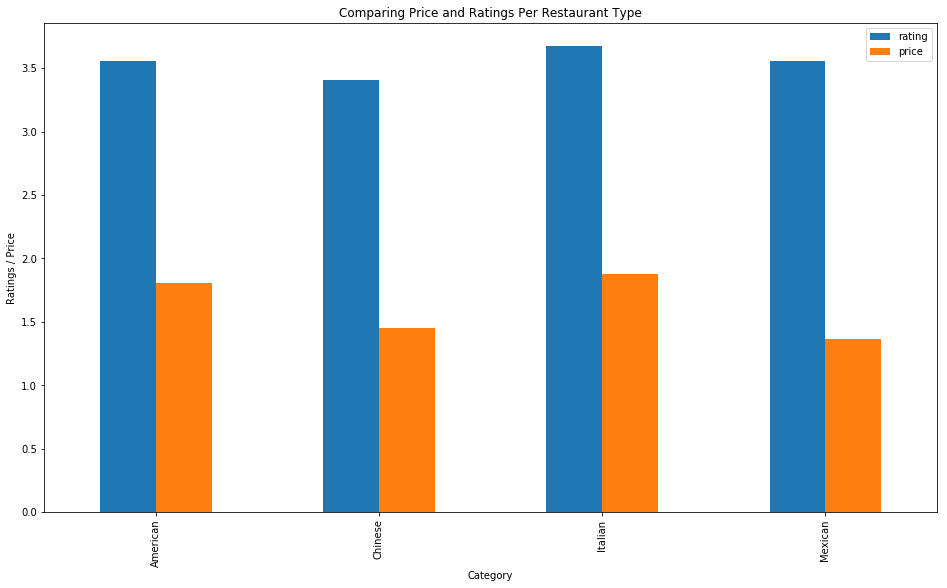

In [96]:
res_df.groupby("category").mean().plot(kind="bar",figsize=(16,9))
plt.xlabel("Category")
plt.ylabel("Ratings / Price")
plt.title("Comparing Price and Ratings Per Restaurant Type")
plt.savefig("Comparing_price_and_ratingcourt.png")
plt.show()

In [97]:
#merge res. data with county data
merged=pd.merge(res_df,counties,how="left",on="county_string")
#only bringing in the fields we need
newdf1=merged[["category","Region","county_string","price","rating","review_count","Income"]]
newdf=newdf1.groupby(["category","Region","price","rating","Income"])["review_count"].sum()
newdf.to_csv("newdf1.csv",header=True)
newdf=pd.read_csv("newdf1.csv")
newdf.head()

,category,Region,price,rating,Income,review_count
0,American,MW,1,1.0,44757.0,1
1,American,MW,1,1.5,50765.0,40
2,American,MW,1,1.5,60061.0,3
3,American,MW,1,2.0,43625.0,24
4,American,MW,1,2.0,44757.0,1


In [98]:
newdf5=newdf[["category","Region","price","rating"]]
newdf6=newdf[["category","Region","review_count"]]
newdf6["Incomecalc"]=newdf["Income"]
newdf5.head()

C:\Users\kfw32\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,category,Region,price,rating
0,American,MW,1,1.0
1,American,MW,1,1.5
2,American,MW,1,1.5
3,American,MW,1,2.0
4,American,MW,1,2.0


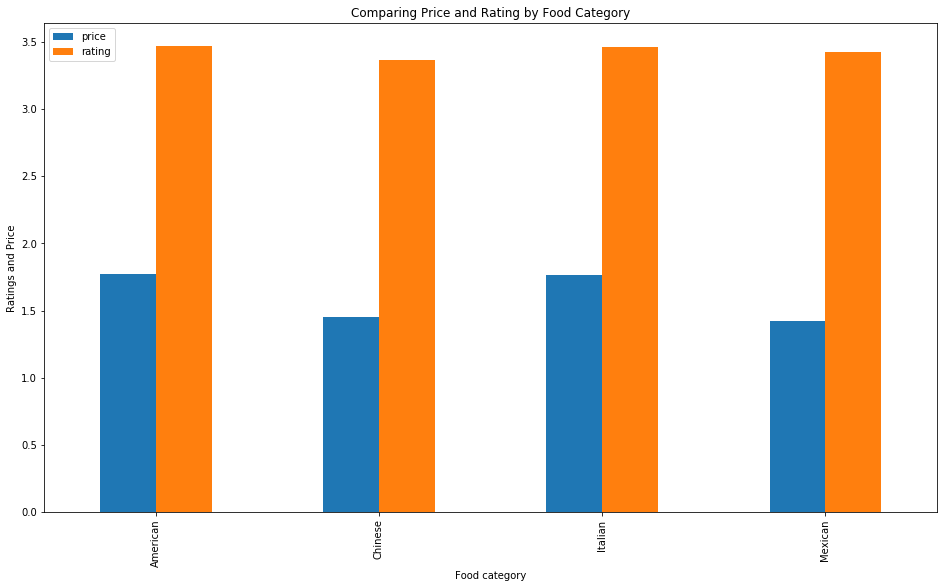

In [99]:
newdf5.groupby("category").mean().plot(kind="bar",figsize=(16,9))
plt.xlabel("Food category")
plt.ylabel("Ratings and Price")
plt.title("Comparing Price and Rating by Food Category")
plt.text(5,2, "", fontsize=12)
plt.savefig("Comparing_price_and_ratingcount.png")
plt.show()

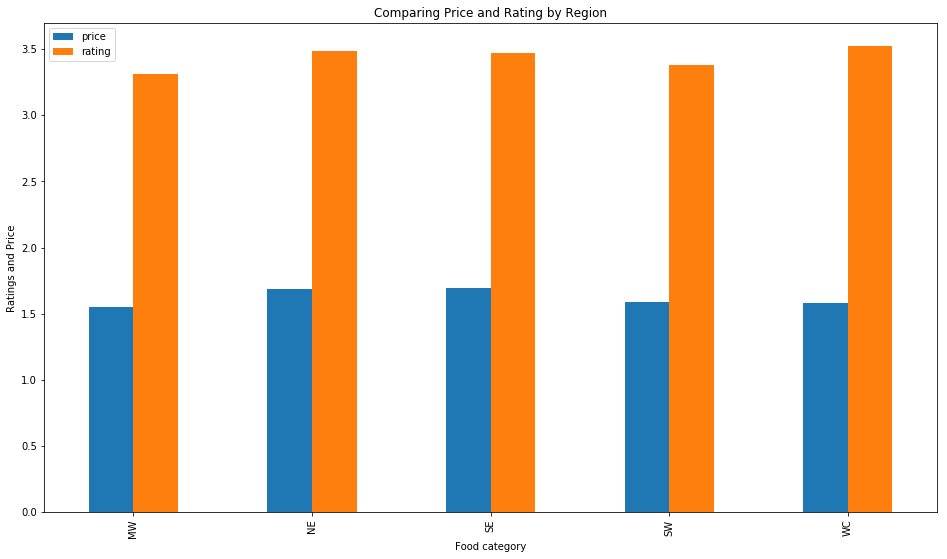

In [100]:
newdf5.groupby("Region").mean().plot(kind="bar",figsize=(16,9))
plt.xlabel("Food category")
plt.ylabel("Ratings and Price")
plt.title("Comparing Price and Rating by Region")
plt.text(5,2, "", fontsize=12)
plt.savefig("Comparing_price_and_rating_count.png")
plt.show()

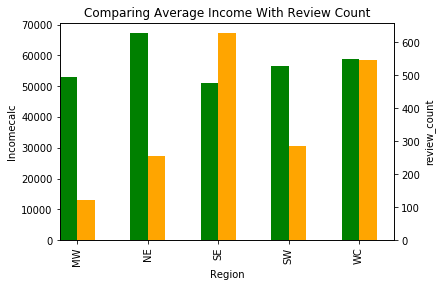

In [101]:
#plt.xlabel("Region")
#plt.ylabel("Review Count and Income") #to change to double y axis
fig=plt.figure()
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
newdf6.groupby("Region").mean()["Incomecalc"].plot(kind="bar",ax=ax1, width=.25,position=1, color="green")
newdf6.groupby("Region").mean()["review_count"].plot(kind="bar",ax=ax2, width=.25, position=0, color="orange")
ax1.set_ylabel("Incomecalc")
ax2.set_ylabel("review_count")
plt.title("Comparing Average Income With Review Count")
plt.text(5,2, "", fontsize=12)
plt.savefig("ReviewVsIncome.png")
plt.show()

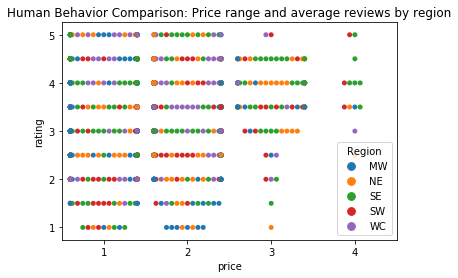

In [102]:
sns.swarmplot(x="price",y="rating",data=newdf5, hue="Region")
plt.title("Human Behavior Comparison: Price range and average reviews by region")
plt.text(5,2, "", fontsize=12)
plt.show()

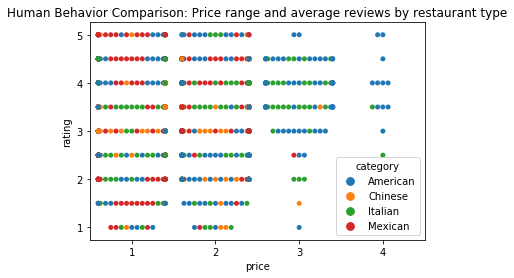

In [103]:
sns.swarmplot(x="price",y="rating",data=newdf5, hue="category")
plt.title("Human Behavior Comparison: Price range and average reviews by restaurant type")
plt.text(5,2, "", fontsize=12)
plt.show()

<h3>Part 1: Merging Data</h3>
    
Since a large part of our project revolved around correlationg geograpic location and Yelp restaurant data, we needed to merge all the necessary information into one larger dataframe. Thus, we merged res_df with our counties data on the county_string column. This allowed us to pull in and use all the data from both sources. 

Up until this point, if you noticed above, we had not inserted our regions, only created a placeholder column. In merging the two datasets, we were also able to populate our region column accordingly. 

We then printed res_df as a check to verify contents. 


In [104]:
res_df= pd.merge(res_df,counties,how="left",on="county_string")
res_df.head()

,name,zipcode,county_string,rating,review_count,category,price,region,CensusId,State,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,CountySize,Region,total restaurants in county
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,989,Mexican,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,684,Mexican,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0


<h3>IDK - KYRUS can fill this part in. </h3>
<h3>Part 2: Examining category distribution across the US </h3>

In [105]:
itadf = res_df.groupby(res_df["category"]).get_group("Italian")
mexdf = res_df.groupby(res_df["category"]).get_group("Mexican")
chndf = res_df.groupby(res_df["category"]).get_group("Chinese")
usadf = res_df.groupby(res_df["category"]).get_group("American")
res_df


,name,zipcode,county_string,rating,review_count,category,price,region,CensusId,State,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,CountySize,Region,total restaurants in county
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,989,Mexican,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,684,Mexican,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
5,The Cellar At Duckworth's,28202,"Mecklenburg County, North Carolina",4.5,361,American,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
6,Pinky's Westside Grill,28208,"Mecklenburg County, North Carolina",4.0,856,American,1,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
7,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,American,3,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
8,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,Italian,3,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0
9,VBGB Beer Hall and Garden,28206,"Mecklenburg County, North Carolina",4.5,326,American,2,region,37119,North Carolina,...,25.3,502455,86.0,9.1,4.8,0.1,8.9,huge,SE,982.0


<h3>IDK - KYRUS can fill this part in. </h3>
<h3>Part 2: Examining category distribution across the US </h3>

In [106]:
TOTAL_price_avg = res_df.groupby(["price"]).mean()
rescount = res_df.groupby(["county_string"]).count()["name"].reset_index()
rescount.columns=['county_string', 'restaurant_count']
TOTAL_county_reviews = res_df.groupby(["county_string"]).review_count.sum().reset_index()
TOTAL_county_reviews.columns=["county_string","review_count"]
TOTAL_county_avg = res_df.groupby(res_df["county_string"]).mean().reset_index()

county_stats = TOTAL_county_avg.merge(TOTAL_county_reviews, on="county_string")
csdf = county_stats.merge(counties, on="county_string")
c_df = rescount.merge(csdf, on="county_string")
c_df.head()

,county_string,restaurant_count,rating,price,CensusId_x,TotalPop_x,Men_x,Women_x,Hispanic_x,White_x,...,MeanCommute_y,Employed_y,PrivateWork_y,PublicWork_y,SelfEmployed_y,FamilyWork_y,Unemployment_y,CountySize,Region,total restaurants in county_y
0,"Beltrami County, Minnesota",24,3.458333,1.708333,27007.0,45434.0,22740.0,22694.0,1.9,73.4,...,20.2,20579,66.8,26.9,6.2,0.1,10.6,tiny,MW,76.0
1,"Bergen County, New Jersey",341,3.749267,1.914956,34003.0,926330.0,448049.0,478281.0,17.9,59.4,...,31.9,459612,82.6,11.6,5.7,0.2,6.5,huge,NE,839.0
2,"Brevard County, Florida",165,3.481818,1.684848,12009.0,553591.0,270544.0,283047.0,9.1,76.1,...,24.2,229693,80.5,13.9,5.4,0.2,10.9,large,SE,505.0
3,"Butte County, California",21,3.357143,1.523810,6007.0,222564.0,110115.0,112449.0,15.2,73.8,...,19.9,89411,71.8,17.3,10.5,0.5,12.1,medium,WC,52.0
4,"Cascade County, Montana",55,3.209091,1.527273,30013.0,82090.0,41098.0,40992.0,3.9,86.3,...,15.7,37069,75.5,16.5,7.7,0.3,5.1,small,MW,180.0


In [107]:
comp_df = pd.DataFrame(columns=["Italian","Mexican","Chinese","American","county_string"])
for current_county in sample_list:
    #current_county="Mecklenburg County, North Carolina"
    try:
        cc= res_df.groupby(res_df["county_string"]).get_group(current_county)
        ccbreakdown = pd.DataFrame(cc["category"].value_counts()).T.reset_index()
        ccrate = pd.DataFrame(cc["rating"].value_counts()).T.reset_index()
        ccbreakdown["county_string"]=current_county
        cc_price_avg = cc.groupby(res_df["price"]).mean()
        cc_price_count = pd.DataFrame(cc["price"].value_counts())
        comp_df = comp_df.append(ccbreakdown)
    except:
        print("No data found for ", current_county)
comp_df = comp_df.reset_index()
del comp_df["index"]
del comp_df["level_0"]
comp_df

,American,Chinese,Italian,Mexican,county_string
0,184,34,45,72,"Mecklenburg County, North Carolina"
1,30,5,9,18,"Snohomish County, Washington"
2,101,51,50,108,"Contra Costa County, California"
3,4,1,2,1,"Cuyahoga County, Ohio"
4,122,35,36,31,"Macomb County, Michigan"
5,50,14,20,46,"Denton County, Texas"
6,142,29,43,182,"Tarrant County, Texas"
7,157,8,74,35,"Palm Beach County, Florida"
8,200,21,61,65,"Fulton County, Georgia"
9,68,18,28,9,"Monroe County, New York"


<h3>Part 2: Examining category distribution across the US </h3>

Next, Kyrus generated a for loop to create multiple pie charts representing the categorical breakdown by count

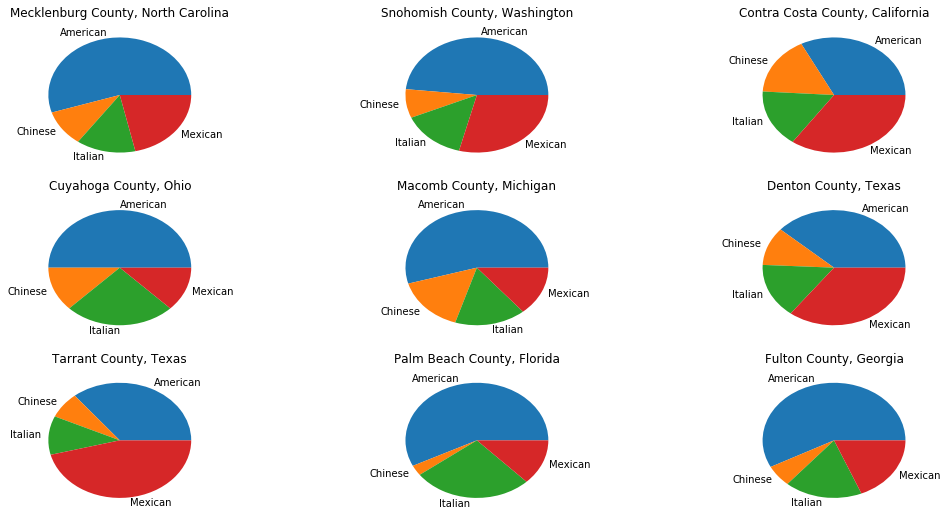

In [108]:
fig, axes = plt.subplots(3,3,figsize= (16,9))
for i, (idx, row) in enumerate(comp_df.set_index("county_string").iterrows()):
    try:
        ax = axes[i // 3, i % 3]
        row = row[row.gt(row.sum()*.01)]
        ax.pie(row, labels=row.index)
        ax.set_title(idx)
    except:
        print()
fig.subplots_adjust(wspace=1)

In [109]:
scatterplot_df=pd.DataFrame(columns=["county_string","Number of Restaurants"])
scatterplot_df["Number of Restaurants"] = rvc["total restaurants in county"] #pd.DataFrame(res_df["county_string"].value_counts().reset_index()["county_string"])
scatterplot_df["county_string"] = pd.DataFrame(res_df["county_string"].value_counts().reset_index()["index"])
scpri=counties[["Region","Income","TotalPop","county_string"]]
scatterplot_df= scatterplot_df.merge(scpri, how="left",on="county_string")
scatterplot_df=scatterplot_df.set_index("county_string")
scatterplot_df = scatterplot_df.loc[scatterplot_df["Number of Restaurants"]>= 10]
scatterplot_SE=scatterplot_df.groupby("Region").get_group("SE")
scatterplot_SW=scatterplot_df.groupby("Region").get_group("SW")
scatterplot_WC=scatterplot_df.groupby("Region").get_group("WC")
scatterplot_MW=scatterplot_df.groupby("Region").get_group("MW")
scatterplot_NE=scatterplot_df.groupby("Region").get_group("NE")
scatterplot_df

,Number of Restaurants,Region,Income,TotalPop
county_string,,,,
"Tarrant County, Texas",983,SW,58711.0,1914526
"Fulton County, Georgia",982,SE,57207.0,983903
"Bergen County, New Jersey",976,NE,85806.0,926330
"Mecklenburg County, North Carolina",839,SE,56854.0,990288
"Contra Costa County, California",823,WC,80185.0,1096068
"Palm Beach County, Florida",726,SE,53363.0,1378806
"Union County, New Jersey",669,NE,69594.0,548744
"Macomb County, Michigan",663,MW,54582.0,854689
"Summit County, Ohio",655,MW,50765.0,541847


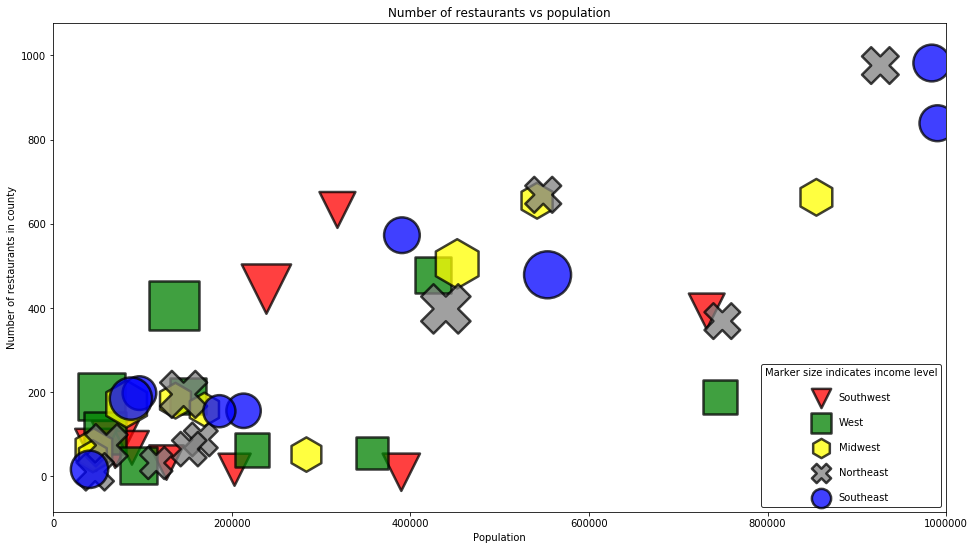

In [110]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title("Number of restaurants vs population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of restaurants in county")
ax.scatter(scatterplot_SW["TotalPop"],y=scatterplot_SW["Number of Restaurants"], c="red", alpha=.75,
                marker="v", edgecolors="black", linewidths=2.5, s=(scatterplot_df["Income"]/25-1000))
ax.scatter(scatterplot_WC["TotalPop"],y=scatterplot_WC["Number of Restaurants"], c="green", alpha=.75,
                marker="s", edgecolors="black", linewidths=2.5, s=(scatterplot_df["Income"]-25000)/25)
ax.scatter(scatterplot_MW["TotalPop"],y=scatterplot_MW["Number of Restaurants"], c="yellow", alpha=.75,
                marker="h", edgecolors="black", linewidths=2.5, s=(scatterplot_df["Income"]-25000)/25)
ax.scatter(scatterplot_NE["TotalPop"],y=scatterplot_NE["Number of Restaurants"], c="gray", alpha=.75,
                marker="X", edgecolors="black", linewidths=2.5, s=(scatterplot_df["Income"]-25000)/25)
ax.scatter(scatterplot_SE["TotalPop"],y=scatterplot_SE["Number of Restaurants"], c="blue", alpha=.75,
                marker="o", edgecolors="black", linewidths=2.5, s=(scatterplot_df["Income"]-25000)/25)
plt.xlim(0,1000000)
ax.legend(markerscale=.5,fancybox=True, edgecolor="black",labelspacing=1.5,
          labels=["Southwest","West","Midwest","Northeast","Southeast"], 
          loc="lower right",title="Marker size indicates income level",)

plt.show()

## plt.show()

<h3>Part 3: Examining price breakdown based on region and restaurant category</h3>

<b>The RQ:</b> How does price rating (\$, \$\$, \$\$\$, \$\$\$\$) breakdown for our randomly pulled cities? What is a the price rating breakdown by specific region and restaurant category? We expect higher income regions to have higher priced restaurants - ex: we would expect New York County  to have more 4\$ restaurants than a given county in the Midwest. We will see if the data of our randomly selected cities shows an even or uneven distribution based on price breakdown by category and by region. 

---------------------------------

After examining the categorical breakdown based on county, we moved on to determine the price breakdown by both region and restaurant category. 

This was Randi's portion of the project. We ran into some tricky stuff with the stacked bar charts. The primary issue was that the each bar's list needed to be the same length, that was fine, except when there was a restaurant for every price braket. Also, in all of her research Randi could not find how to make the stacked bars dynamic. In all the examples she found, the bar values were created manually. This is fine if you have a small dataset that you do not intend to run over and over again; however, this was not ideal for this project. 

<b>With some help from Mirko, Ryan, and Caleb, we figured it out! </b>

First, we needed to define this list we would be looping through. For the first chart, Number of \$ per Category, we created a list named labels that contained all the different restaurant categories. Then, we created a second list with four empty lists. These four empty lists would represet 1\$, 2\$, 3\$, and 4\$. We then looped through our category list and found the count for each of the dollar ratings in said category. Once the loop determined how many 1\$, 2\$, 3\$, and 4\$ there were in each category it appended it to the corresponding empty list. If we did not find a 1\$, 2\$, 3\$, and 4\$ for a particular restaurant category, then the except argument kicked-in and instead appended a zero. Again, the goal was to make each of the four lists the same length. 

In the end, we ended up with a list corresponding to 1\$, 2\$, 3\$, and 4\$, with ratings per restaurant category. 

Once we created this loop and stored the counts in lists, we could call these lists in our chart creation; thereby, making the charts dynamic, changing with the number of pulls.

In [111]:
# Established the restaurant categories we will loop through
labels = ["Italian","Mexican","Chinese","American"]

# Create and list of empty lists that will hold the count for $, $$, $$$, $$$$ per restaurant category
bars =[[],[],[],[]]

# Will first loop through the restaurant categories
for label in labels:
    df= res_df.loc[res_df["category"]==label, :]
    counts = df["price"].value_counts()
    
    # Now will loop through the price ranges and if there is a price, it will append it to the matching empty list
    # If there is no restaurant in that price range, then the we will use the except and append a zero
    for price in range(1,5):
        try:
            bars[price-1].append(counts[price])
        except: 
            bars[price-1].append(0)

# Check
print(bars[1])

[672, 464, 269, 1656]


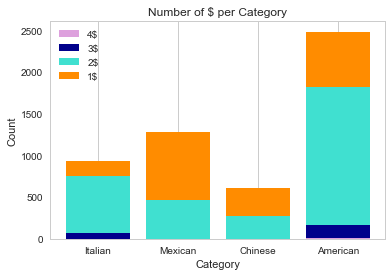

In [112]:
from matplotlib import rc

# Establish our seaborn settings 
sns.set()
# orgPalette = sns.color_palette("Set2", len(res_by_price))
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':False})

# set fig size
figsize= (100, 100, 50)
 
# Values for each stacked bar based on our above for loop 
# This make the bar values dynamic so we do not have to manually set the values 
bars1 = bars[0]
bars2 = bars[1]
bars3 = bars[2]
bars4 = bars[3]
x = np.arange(len(bars1))

# Plot our four bars from above values
four_dolla=plt.bar(x, bars4, color="plum")
three_dolla=plt.bar(x, bars3, color="darkblue", bottom=bars4)
two_dolla=plt.bar(x, bars2, color="turquoise", bottom=list(map(lambda x,y: x+y, bars3,bars4)))
one_dolla=plt.bar(x, bars1, color="darkorange", bottom=list(map(lambda x,y,z: x+y+z, bars3,bars4,bars2)))

# Set our xticks based on categories
plt.xticks(x, ["Italian","Mexican","Chinese","American"])

# Set our grid
plt.grid(axis='y')

# Set graph labels 
plt.xlabel("Category")
plt.ylabel('Count')
plt.title('Number of $ per Category')
    
# Set our legend
plt.legend((four_dolla[0], three_dolla[0],two_dolla[0], one_dolla[0]), ('4$', '3$','2$', '1$'), loc="best")


# Show graphic
plt.show()

# Save image
plt.savefig("stacked.png")

In [113]:
# Established the regions we will loop through
region = ["NE","MW","WC","SW","SE"]

# Create and list of empty lists that will hold the count for $, $$, $$$, $$$$ per region
r_bars =[[],[],[],[]]

# Will first loop through the regions
for r in region:
    reg_bars= res_df.loc[res_df["Region"]==r, :]
    reg_counts = reg_bars["price"].value_counts()
    
    # Now will loop through the price ranges and if there is a price, it will append it to the matching empty list
    # If there is no restaurant in that price range, then the we will use the except and append a zero
    for price in range(1,5):
        try:
            r_bars[price-1].append(reg_counts[price])
        except: 
            r_bars[price-1].append(0)

# Check            
print(r_bars)


[[289, 393, 355, 482, 486], [650, 464, 517, 466, 964], [71, 16, 17, 23, 105], [2, 1, 1, 3, 10]]


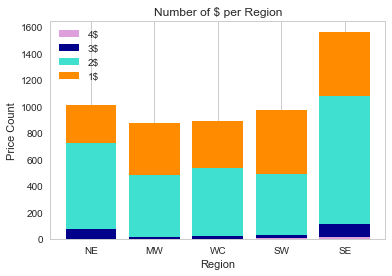

In [114]:
# Establish our seaborn settings 
sns.set()
# orgPalette = sns.color_palette("Set2", len(res_by_price))
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':False})

# set fig size
figsize= (100, 100, 50)

# Values for each stacked bar based on our above for loop 
# This make the bar values dynamic so we do not have to manually set the values 
bars1 = r_bars[0]
bars2 = r_bars[1]
bars3 = r_bars[2]
bars4 = r_bars[3]
x = np.arange(len(bars1))

# Plot our four bars from above values
four_dol = plt.bar(x, bars4, color="plum")
three_dol =plt.bar(x, bars3, color="darkblue", bottom=bars4)
two_dol =plt.bar(x, bars2, color="turquoise", bottom=list(map(lambda x,y: x+y, bars3,bars4)))
one_dol =plt.bar(x, bars1, color="darkorange", bottom=list(map(lambda x,y,z: x+y+z, bars3,bars4,bars2)))

# Set our xticks based on categories
plt.xticks(x, ["NE","MW","WC","SW","SE"])

# Set our grid
plt.grid(axis='y')

# Set graph labels 
plt.xlabel("Region")
plt.ylabel('Price Count')
plt.title('Number of $ per Region')

# Set graph legend 
plt.legend((four_dol[0], three_dol[0],two_dol[0], one_dol[0]), ('4$', '3$','2$', '1$'), loc="best")

# Show graphic
plt.show()

# Save image
plt.savefig("stacked2.png")

<h3>Part 3: Pie Chart</h3>
    
With the dynamic stacked bar charts created, we thought it was relevant to also see the count of each dollar amount when comparing the counts by region or category. Thus, we created a pie chart (also dynamic) that shows the total of each restaurant category by dollar. 

In [115]:
# Check our sums for pie chart
print(sum(bars1))
print(sum(bars2))
print(sum(bars3))
print(sum(bars4))

2005
3061
232
17


In [116]:
# Establish the auto percents
# Create definitions 
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


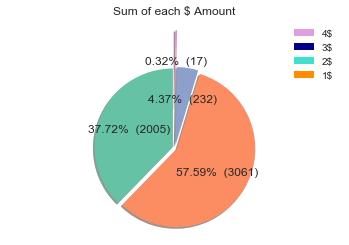

In [117]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

# Establish our seaborn settings 
sns.set()
orgPalette = sns.color_palette("Set2")
sns.set_palette(orgPalette)
# sns.set_style("", {'legend.frameon':False})

# set fig size
plt.figure(figsize=(20,20))

# Set our labels, sizes, and explode values 
# We won't use labels because we will create a legend instead, but we could easily assign the labels

#labels = '4$', '3$','2$', '1$'
sizes = [sum(bars1),sum(bars2),sum(bars3),sum(bars4)]
explode = (0.03, 0.03, 0.03, 0.5)  # only "explode" the 2nd slice 


# Plot our pie chart with total sums by $ breakdown and place the percetages 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=orgPalette, autopct=make_autopct(sizes),
        shadow=True, startangle=90) 

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Set graph title 
plt.title('Sum of each $ Amount')

# Set graph legend 
plt.legend((four_dol[0], three_dol[0],two_dol[0], one_dol[0]), ('4$', '3$','2$', '1$'), loc="best")


# Show graphic
plt.show()

# Save image
plt.savefig("pie_chart.jpg")

<h3>Part 4: MONICA</h3>


<h3>Part 5: CATHERINE</h3>


<h3>Part 6: Conclusions</h3>


<h3>Part 7: Limitations</h3>

Initially, we wanted to find out if there wass there a relationship between income and type of dining (ie dine-in, carry-out, delivery)? Is this based on the number of restaurants that provide these options?


Unfortunately, this didn’t work due to Yelp API limitations. Acoording to their website, currently, the transaction endpoint is "only supports food delivery in the US."

Since the current Yelp Fusion API only supports the delivery option it isn’t very helpful for comparison or analysis purposes. 


<h3>Part 8: If only we had more time...</h3>

<ul>
<li>Attempt to match user category input with local restaurant </li>
<li>"Build a lunch recommendation Slack bot that can pull highest rated Yelp places around your location. You can build the script to respond to user input (ex. “Chinese, $”) or generate top-rated places randomly." This was just too ambitious for our timeframe </li>
</ul>
